In [63]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn.metrics
from pylab import rcParams
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)


In [64]:
df = pd.read_csv('insurance_claims.csv')
df.head()


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [65]:
df.describe()


,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [66]:
df.dtypes


months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [67]:
df.columns


Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [68]:
df.shape


(1000, 40)

In [69]:
df.nunique()


months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             4
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

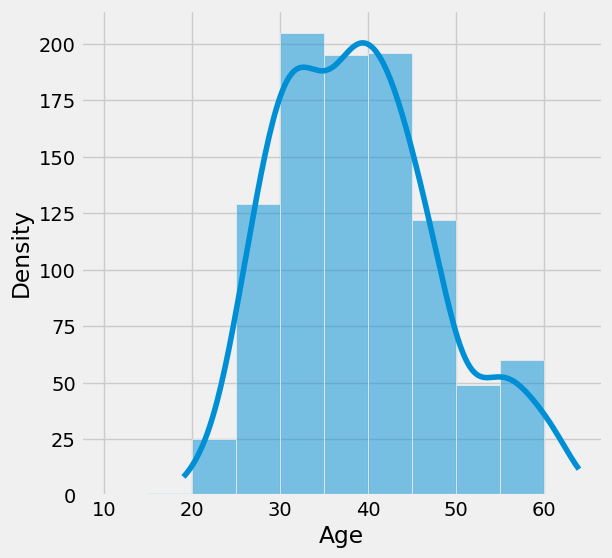

In [70]:
ax = sns.histplot(df.age, bins=np.arange(10,64,5),kde=True)
ax.set_ylabel('Density')
ax.set_xlabel('Age')
plt.show()


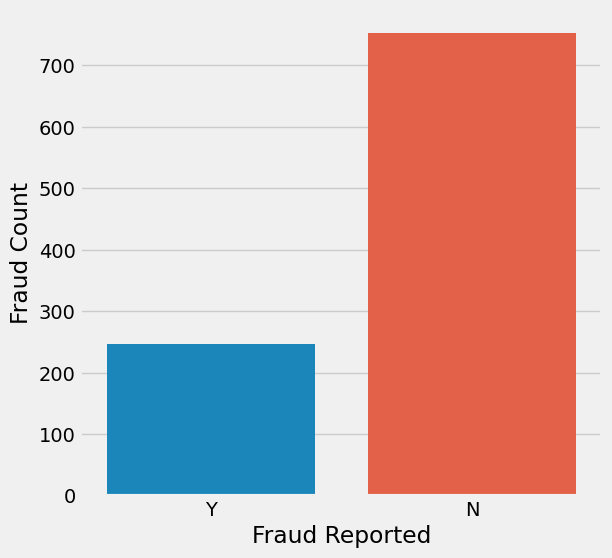

In [71]:
ax = sns.countplot(x='fraud_reported', data=df, hue='fraud_reported')
ax.set_xlabel('Fraud Reported')
ax.set_ylabel('Fraud Count')
plt.show()


From above plot, like most fraud datasets, the label distribution is skewed.

In [72]:
df['fraud_reported'].value_counts() # Count number of frauds vs non-frauds


fraud_reported
N    753
Y    247
Name: count, dtype: int64

In [73]:
df['incident_state'].value_counts()


incident_state
NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: count, dtype: int64

Here we see that almost 25% fraud reported. Let’s try to look for an indicative variable. Let’s analyze location. This dataset only has information from the mid-Atlantic states from the USA.

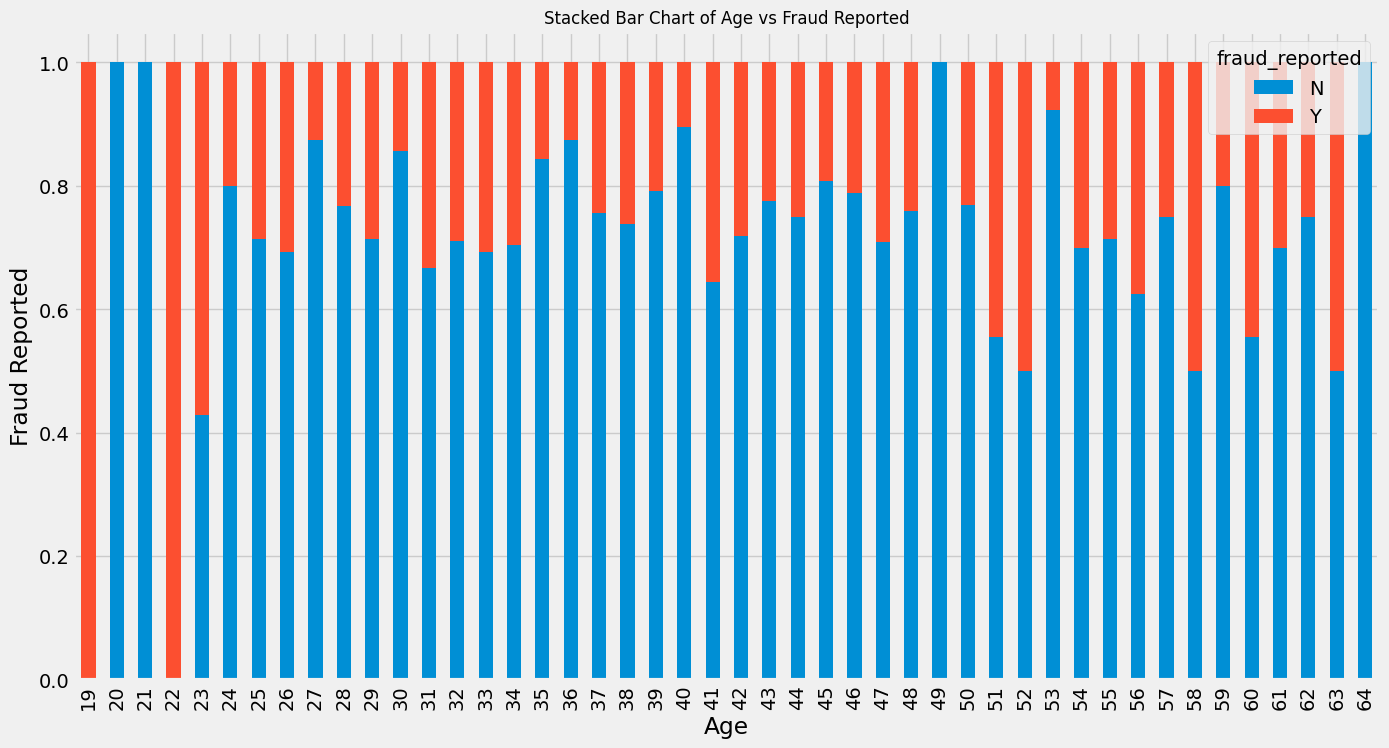

In [74]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(df.age, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Age vs Fraud Reported', fontsize=12)
plt.xlabel('Age')
plt.ylabel('Fraud Reported')
plt.show()


From above plot, it is obvious that, age is an important predictor for fraud reported. Age between 19-23 shows substantial number od fraud report.

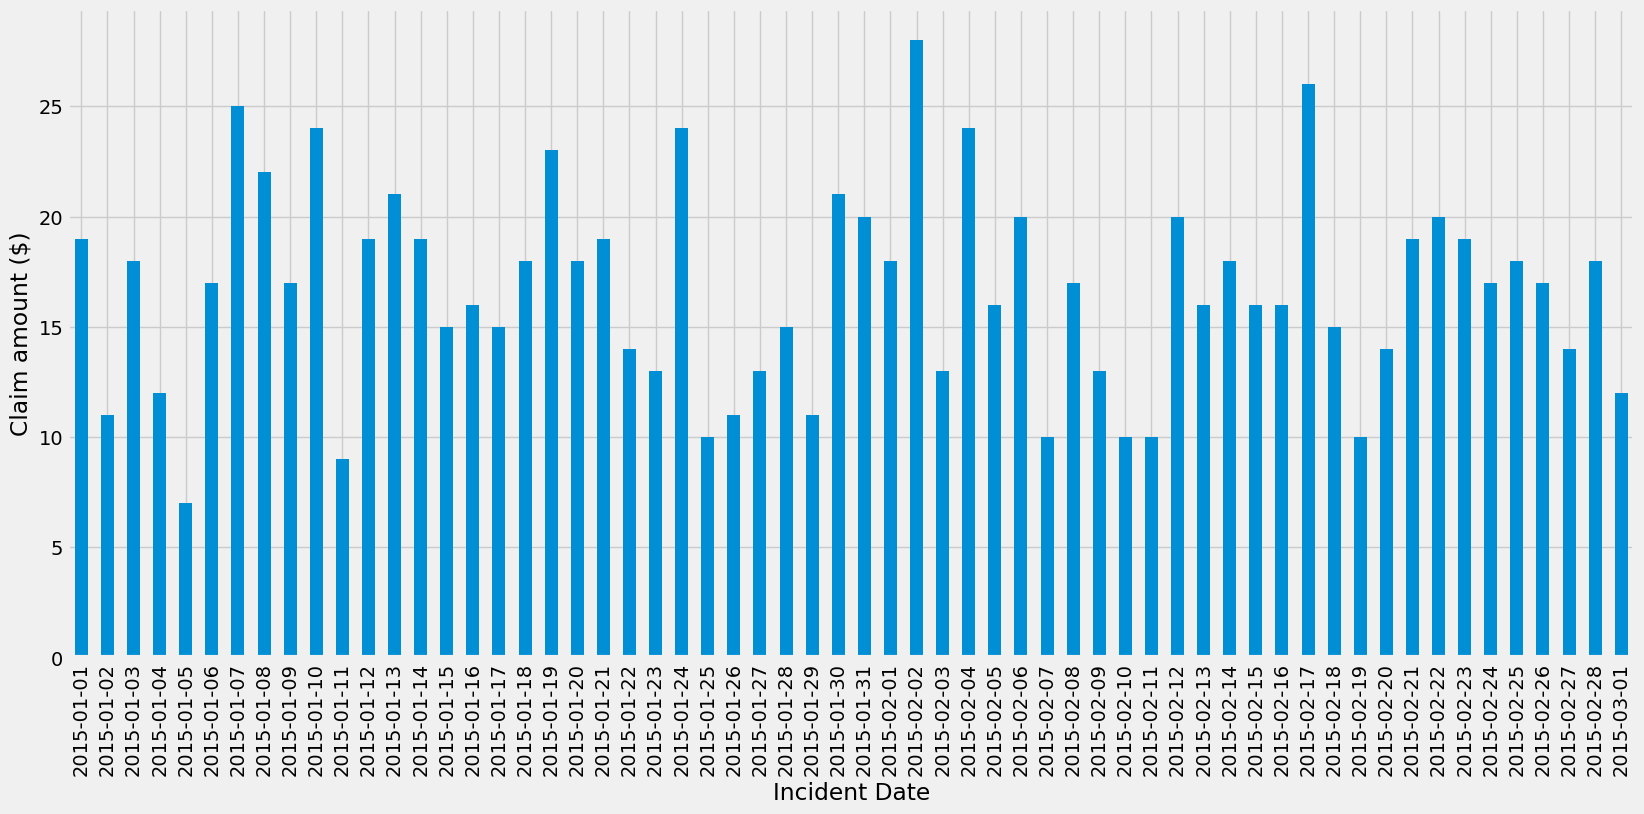

In [75]:
fig = plt.figure(figsize=(18,8))
ax = df.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount ($)')
ax.set_xlabel('Incident Date')
plt.show()


We see that, all the cases in above plot are for the months of January and February 2015

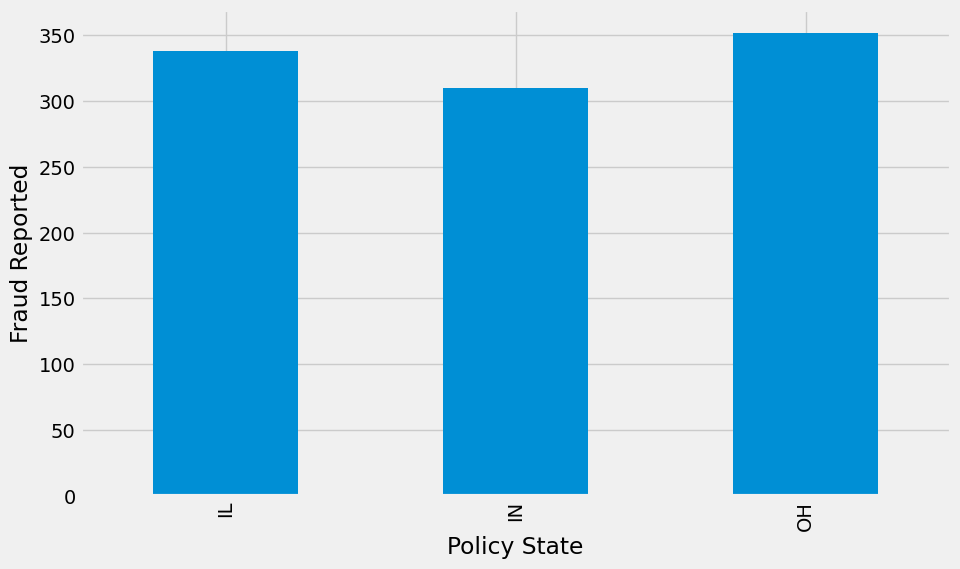

In [76]:
fig = plt.figure(figsize=(10,6))
ax = df.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud Reported')
ax.set_xlabel('Policy State')
plt.show()


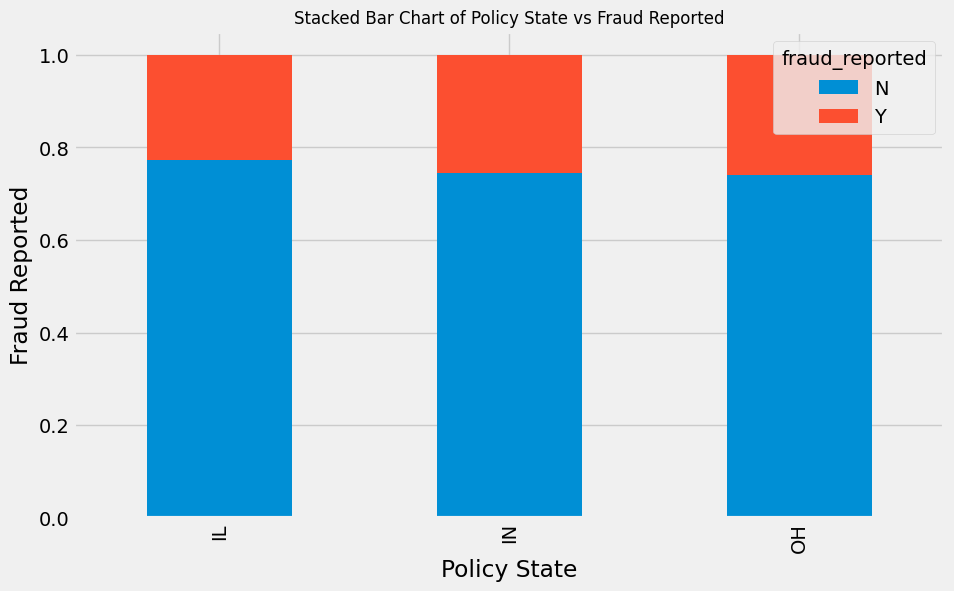

In [77]:
plt.rcParams['figure.figsize'] = [10, 6]

table=pd.crosstab(df.policy_state, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Policy State vs Fraud Reported', fontsize=12)
plt.xlabel('Policy State')
plt.ylabel('Fraud Reported')
plt.show()


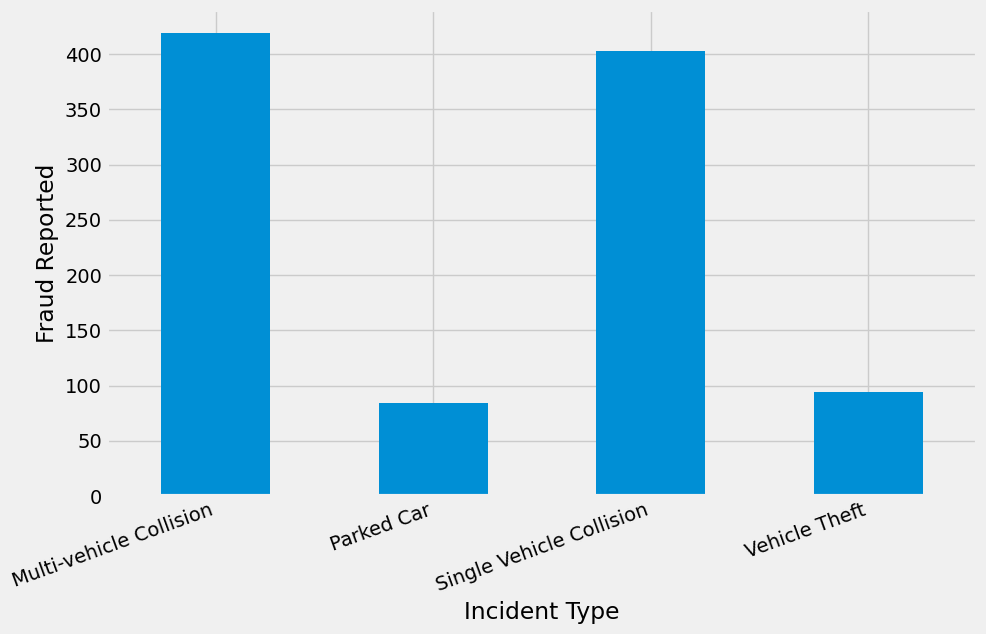

In [78]:

fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_type').fraud_reported.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_ylabel('Fraud Reported')
ax.set_xlabel('Incident Type')
plt.show()


Text(0.5, 0, 'Incident State')

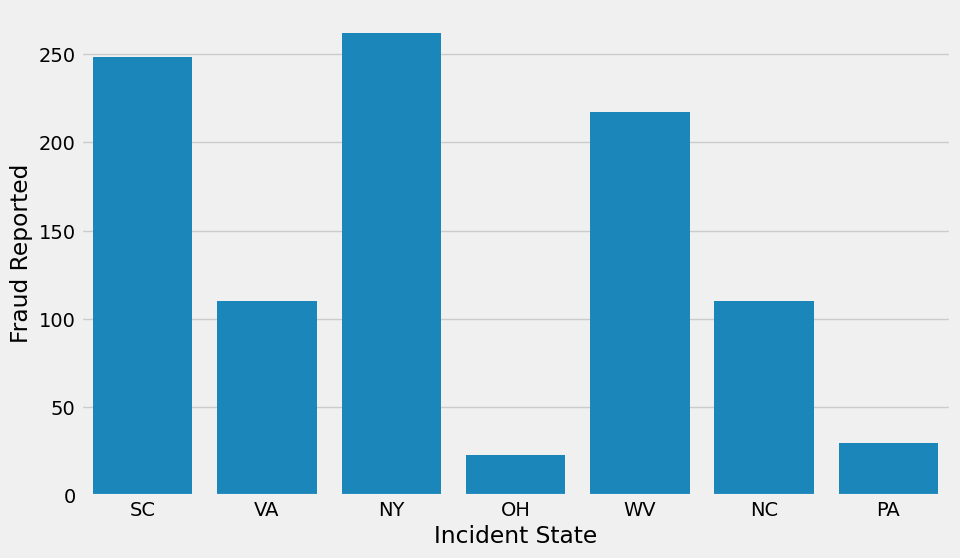

In [79]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='incident_state', data=df)
ax.set_ylabel('Fraud Reported')
ax.set_xlabel('Incident State')


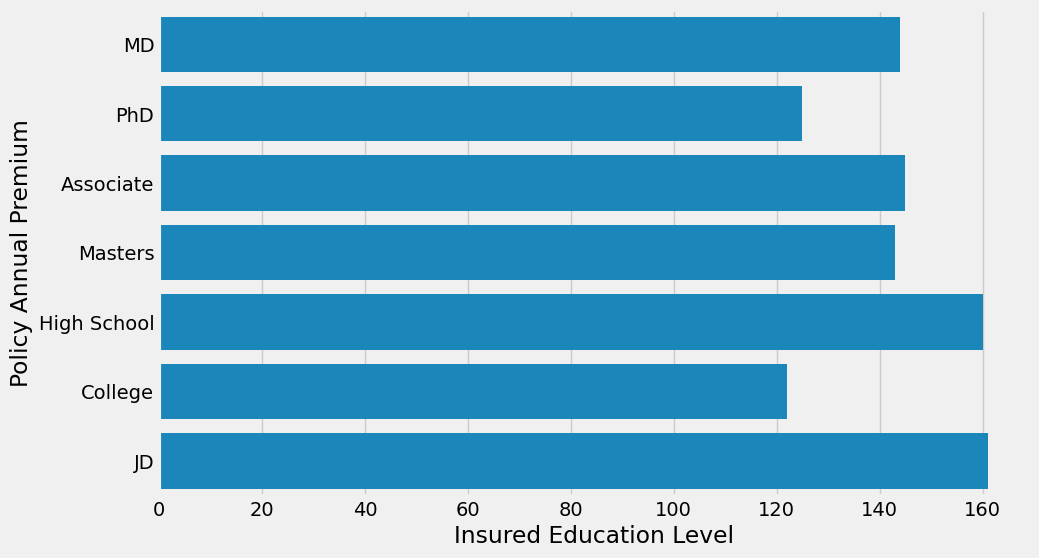

In [80]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(y = 'insured_education_level', data=df)
ax.set_ylabel('Policy Annual Premium')
ax.set_xlabel('Insured Education Level')
plt.show()

# # Breakdown of Average Vehicle claim by insured's education level, grouped by fraud reported


<Figure size 1600x1000 with 0 Axes>

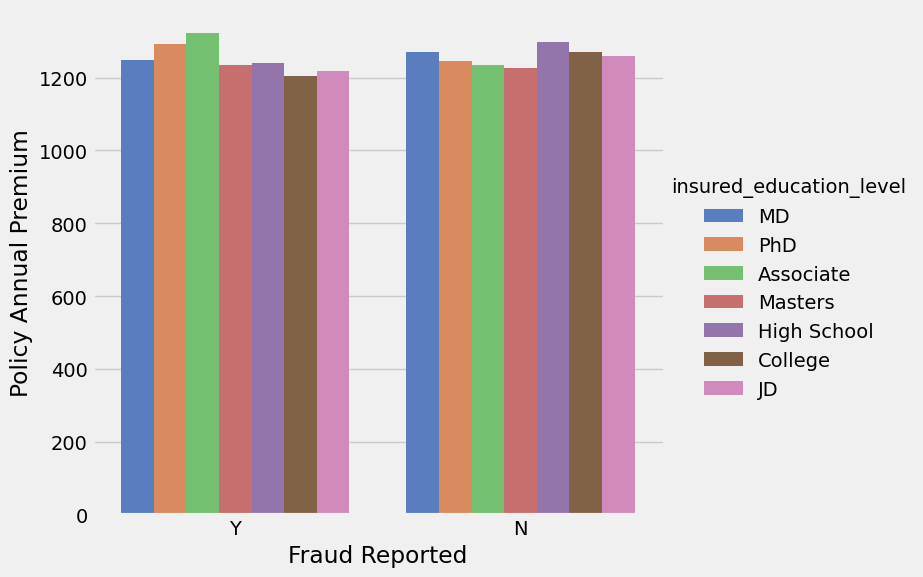

In [81]:
fig = plt.figure(figsize=(16,10))
ax = sns.catplot(x='fraud_reported', y='policy_annual_premium',hue='insured_education_level', data=df,
                    kind="bar", errorbar=None, palette="muted",height=6, legend=True, aspect=1.2)

ax.set_axis_labels("Fraud Reported", "Policy Annual Premium")

plt.show()


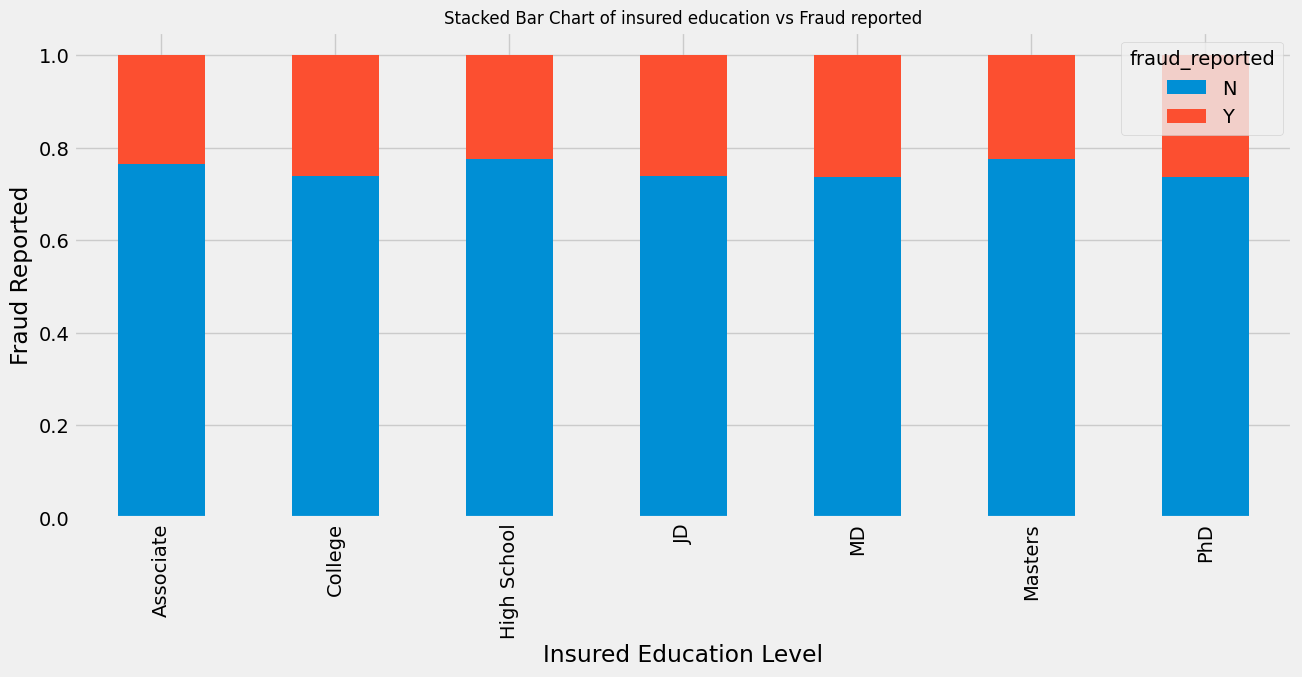

In [82]:
plt.rcParams['figure.figsize'] = [14, 6]
table=pd.crosstab(df.insured_education_level, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of insured education vs Fraud reported', fontsize=12)
plt.xlabel('Insured Education Level')
plt.ylabel('Fraud Reported');


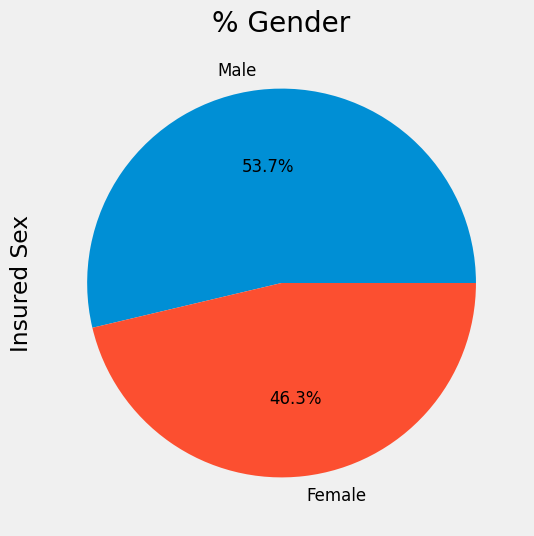

In [83]:
plt.rcParams['figure.figsize'] = [6, 6]
ax = (df['insured_sex'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Male', 'Female'], fontsize=12)
ax.set_title('% Gender')
plt.ylabel('Insured Sex')
plt.show()


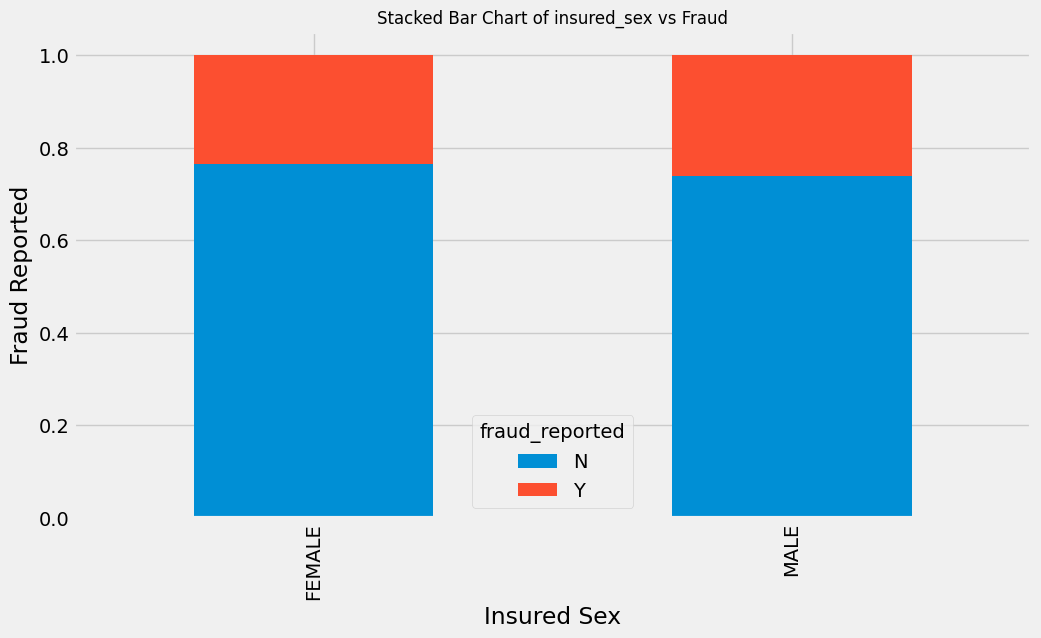

In [84]:
plt.rcParams['figure.figsize'] = [11, 6]
table=pd.crosstab(df.insured_sex, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of insured_sex vs Fraud', fontsize=12)
plt.xlabel('Insured Sex')
plt.ylabel('Fraud Reported')
plt.show()


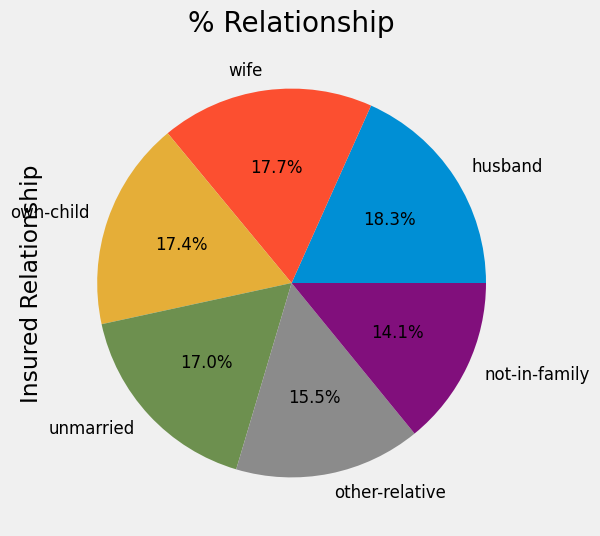

In [85]:
plt.rcParams['figure.figsize'] = [6, 6]
ax = (df['insured_relationship'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['husband', 'wife', 'own-child', 'unmarried', 'other-relative', 'not-in-family'],
         fontsize=12)
ax.set_title('% Relationship')
plt.ylabel('Insured Relationship')
plt.show()


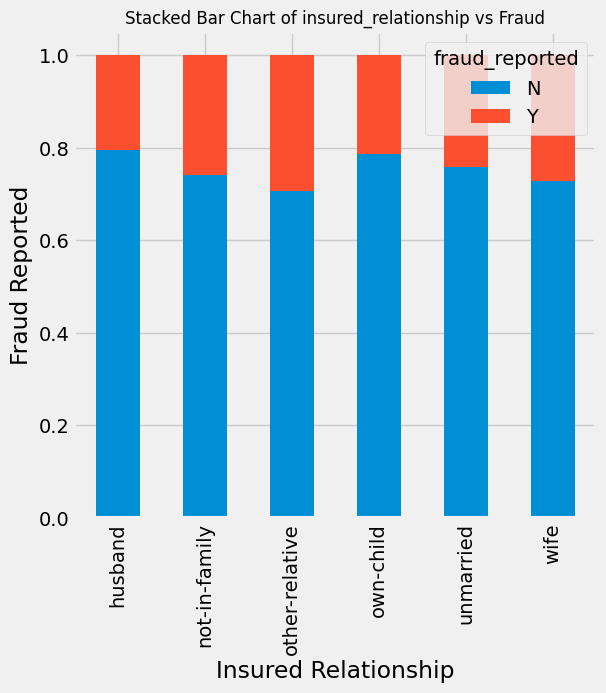

In [86]:
table=pd.crosstab(df.insured_relationship, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of insured_relationship vs Fraud', fontsize=12)
plt.xlabel('Insured Relationship')
plt.ylabel('Fraud Reported')
plt.show()


Text(0, 0.5, 'Incident Type')

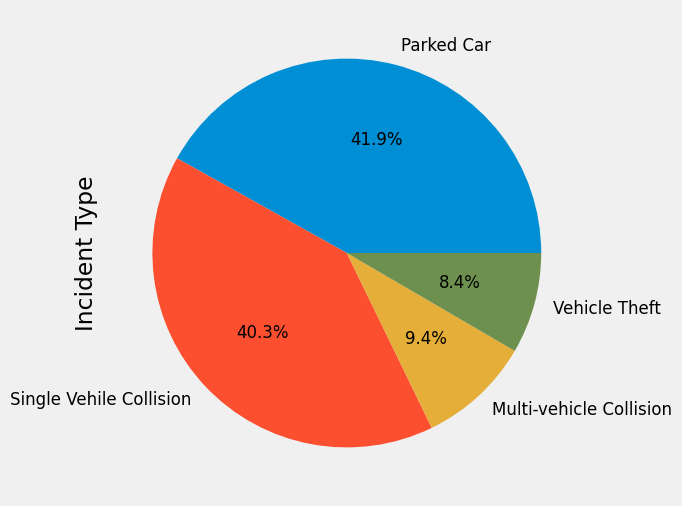

In [87]:
fig = plt.figure(figsize=(6,6))
ax = (df['incident_type'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Parked Car', 'Single Vehile Collision', 'Multi-vehicle Collision', 'Vehicle Theft'],
         fontsize=12)
plt.ylabel('Incident Type')


Text(0, 0.5, 'Authorities Contacted')

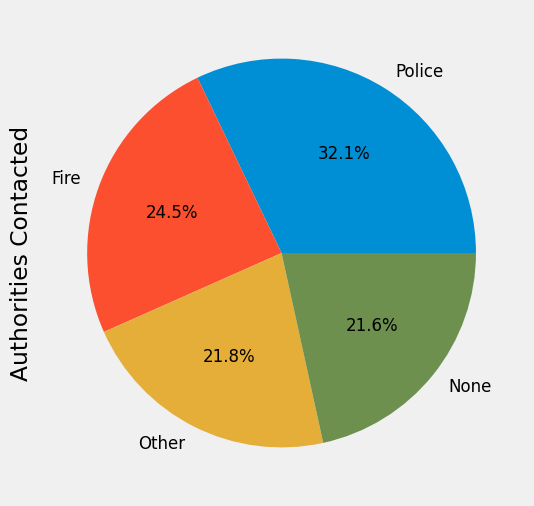

In [88]:
fig = plt.figure(figsize=(6,6))
ax = (df['authorities_contacted'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Police', 'Fire', 'Other', 'None', 'Ambulance'],
         fontsize=12)
plt.ylabel('Authorities Contacted')


/var/folders/v7/fl37bh_11xn4dz8nn__9q52m0000gn/T/ipykernel_92814/2596314199.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


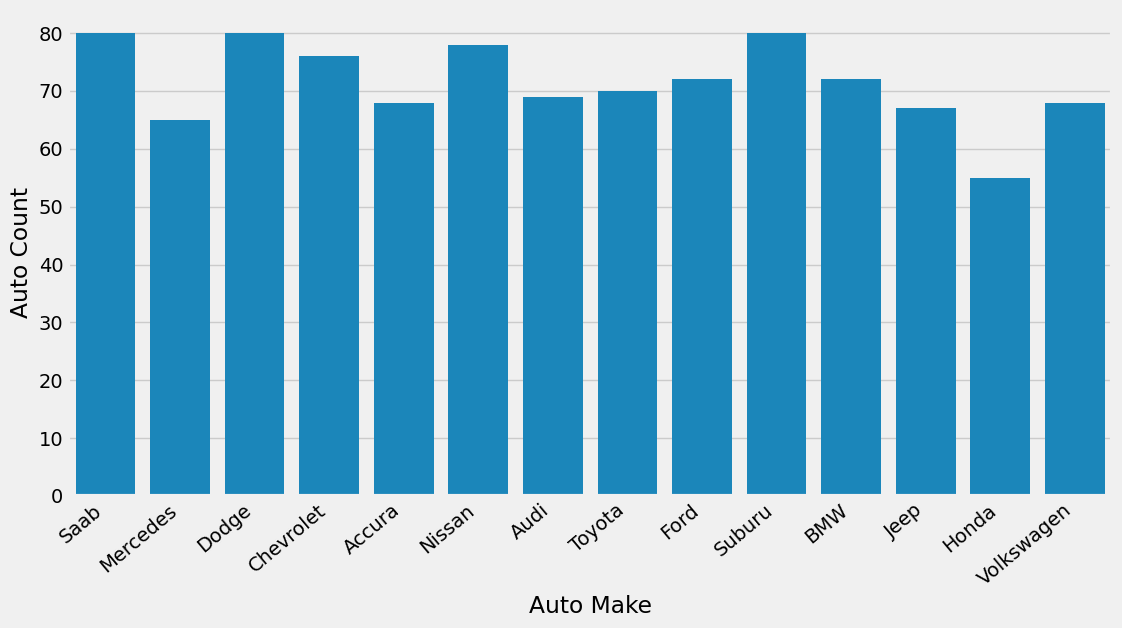

In [89]:
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(x='auto_make', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Auto Make')
plt.ylabel('Auto Count')
plt.show()


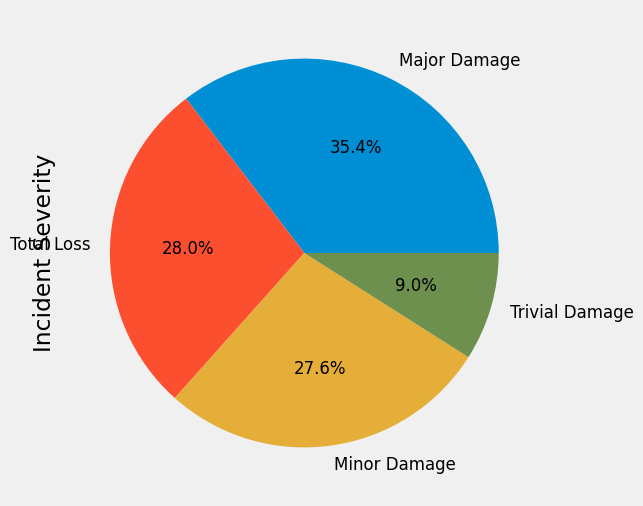

In [90]:
fig = plt.figure(figsize=(6,6))
ax = (df['incident_severity'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Major Damage', 'Total Loss', 'Minor Damage', 'Trivial Damage'],
         fontsize=12)
plt.ylabel('Incident Severity');


/var/folders/v7/fl37bh_11xn4dz8nn__9q52m0000gn/T/ipykernel_92814/3766420970.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


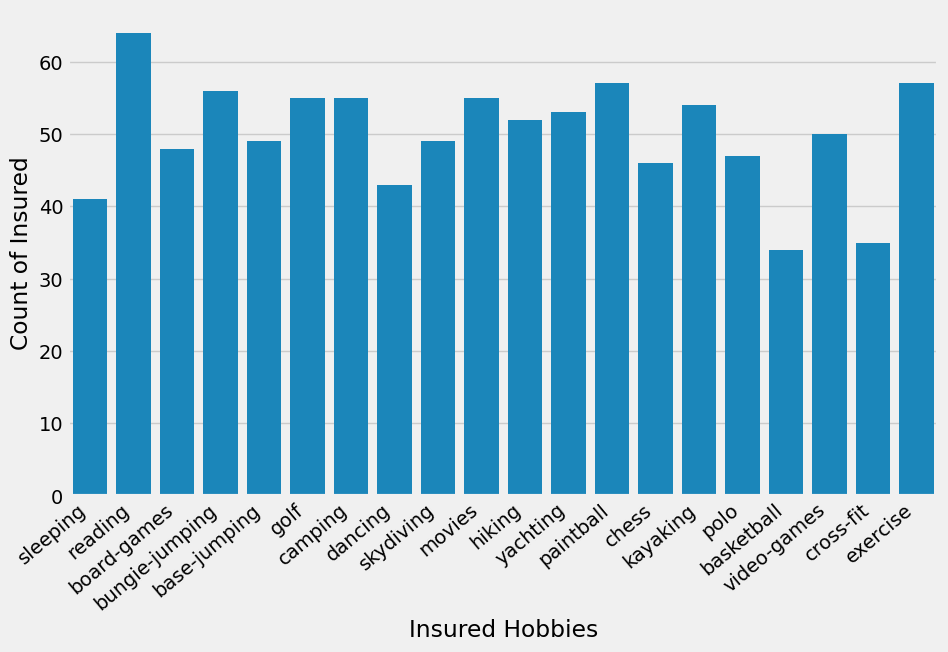

In [91]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='insured_hobbies', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Insured Hobbies')
plt.ylabel('Count of Insured')
plt.show()


In [92]:
df["insured_occupation"].value_counts()


insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: count, dtype: int64

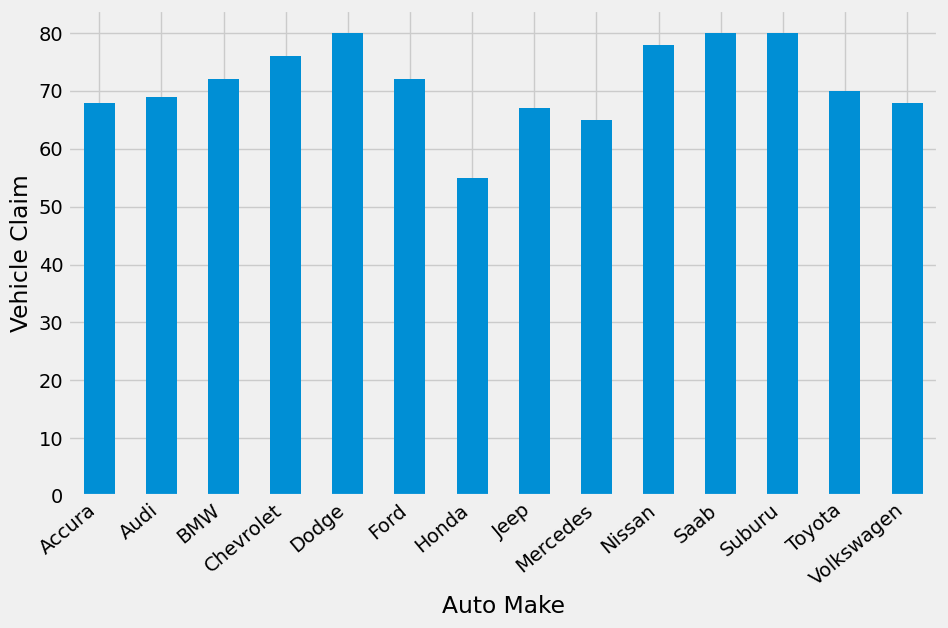

In [93]:
fig = plt.figure(figsize=(10,6))
ax= df.groupby('auto_make').vehicle_claim.count().plot.bar(ylim=0)
ax.set_ylabel('Vehicle Claim')
ax.set_xlabel('Auto Make')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()


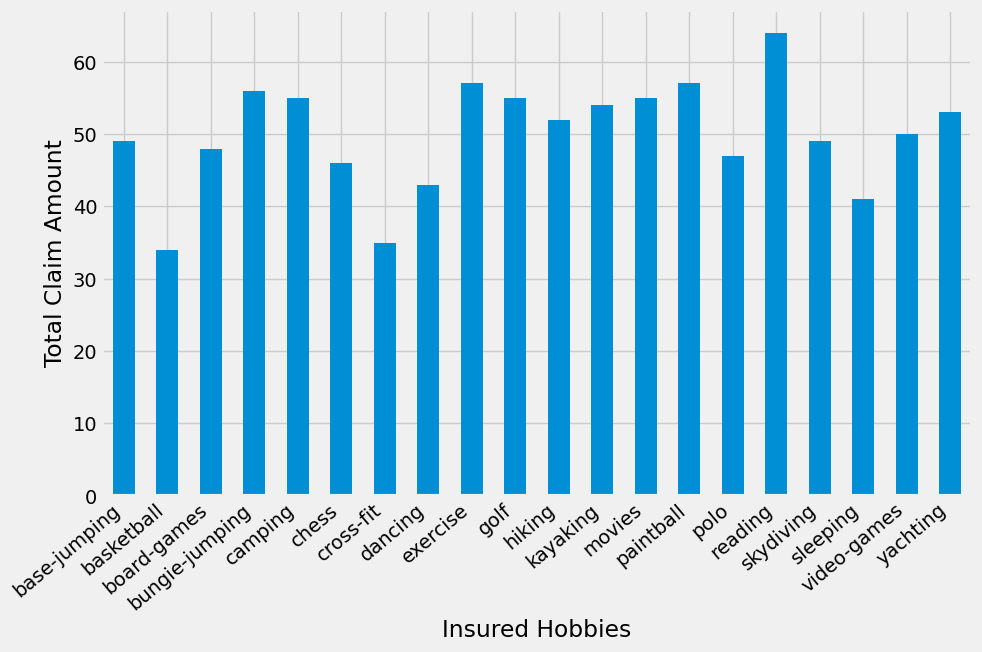

In [94]:
fig = plt.figure(figsize=(10,6))
ax= df.groupby('insured_hobbies').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Total Claim Amount')
ax.set_xlabel('Insured Hobbies')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()


### Data Processing

Cleaning up the data and prepare it for machine learning model.

In [95]:
df['fraud_reported'].replace(to_replace='Y', value=1, inplace=True)
df['fraud_reported'].replace(to_replace='N',  value=0, inplace=True)
df.head()


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,1,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,1,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,0,NaN


Some variables such as 'policy_bind_date', 'incident_date', 'incident_location' and 'insured_zip' contain very high number of level. We will remove these columns for our purposes.

Let's view summary of all the column with the object data-type :

In [97]:
df.describe(include='all')


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
count,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000,1.000000e+03,1000.0,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000,1000,1000,1000,909,1000,1000,1000,1000.000000,1000.00000,1000,1000.000000,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000.000000,0.0
unique,NaN,NaN,NaN,951,3,3,NaN,NaN,NaN,995.0,2,7,14,20,6,NaN,NaN,60,4,4,4,4,7,7,1000,NaN,NaN,3,NaN,NaN,3,NaN,NaN,NaN,NaN,14,39,NaN,NaN,NaN
top,NaN,NaN,NaN,2006-01-01,OH,250/500,NaN,NaN,NaN,477695.0,FEMALE,JD,machine-op-inspct,reading,own-child,NaN,NaN,2015-02-02,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Springfield,9935 4th Drive,NaN,NaN,?,NaN,NaN,?,NaN,NaN,NaN,NaN,Saab,RAM,NaN,NaN,NaN
freq,NaN,NaN,NaN,3,352,351,NaN,NaN,NaN,2.0,537,161,93,64,183,NaN,NaN,28,419,292,354,292,262,157,1,NaN,NaN,360,NaN,NaN,343,NaN,NaN,NaN,NaN,80,43,NaN,NaN,NaN
mean,203.954000,38.948000,546238.648000,NaN,NaN,NaN,1136.000000,1256.406150,1.101000e+06,NaN,NaN,NaN,NaN,NaN,NaN,25126.100000,-26793.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.644000,1.83900,NaN,0.992000,1.487000,NaN,52761.94000,7433.420000,7399.570000,37928.950000,NaN,NaN,2005.103000,0.247000,NaN
std,115.113174,9.140287,257063.005276,NaN,NaN,NaN,611.864673,244.167395,2.297407e+06,NaN,NaN,NaN,NaN,NaN,NaN,27872.187708,28104.096686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.951373,1.01888,NaN,0.820127,1.111335,NaN,26401.53319,4880.951853,4824.726179,18886.252893,NaN,NaN,6.015861,0.431483,NaN
min,0.000000,19.000000,100804.000000,NaN,NaN,NaN,500.000000,433.330000,-1.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-111100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.00000,NaN,0.000000,0.000000,NaN,100.00000,0.000000,0.000000,70.000000,NaN,NaN,1995.000000,0.000000,NaN
25%,115.750000,32.000000,335980.250000,NaN,NaN,NaN,500.000000,1089.607500,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-51500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,1.00000,NaN,0.000000,1.000000,NaN,41812.50000,4295.000000,4445.000000,30292.500000,NaN,NaN,2000.000000,0.000000,NaN
50%,199.500000,38.000000,533135.000000,NaN,NaN,NaN,1000.000000,1257.200000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-23250.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,1.00000,NaN,1.000000,1.000000,NaN,58055.00000,6775.000000,6750.000000,42100.000000,NaN,NaN,2005.000000,0.000000,NaN
75%,276.250000,44.000000,759099.750000,NaN,NaN,NaN,2000.000000,1415.695000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,51025.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,3.00000,NaN,2.000000,2.000000,NaN,70592.50000,11305.000000,10885.000000,50822.500000,NaN,NaN,2010.000000,0.000000,NaN


<Figure size 1400x600 with 0 Axes>

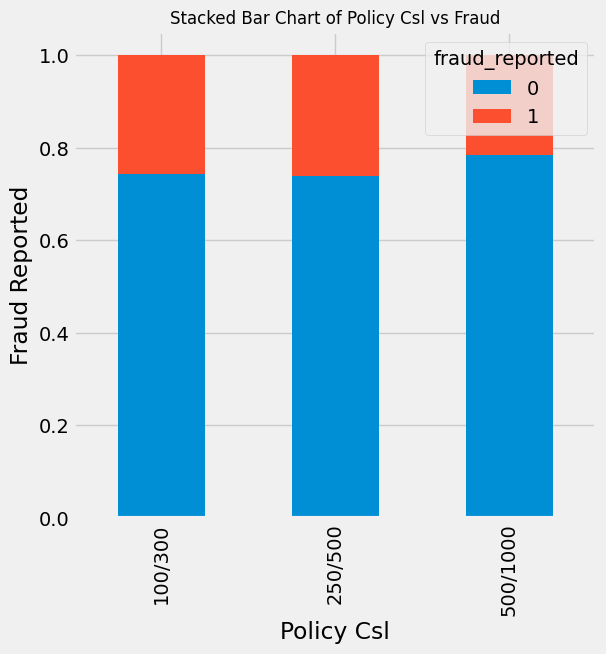

In [98]:
plt.figure(figsize=(14,6))
table=pd.crosstab(df.policy_csl, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Policy Csl vs Fraud', fontsize=12)
plt.xlabel('Policy Csl')
plt.ylabel('Fraud Reported')
plt.show();


policy_csl looks like an unavidable predictor.

In [99]:
df['csl_per_person'] = df.policy_csl.str.split('/', expand=True)[0]
df['csl_per_accident'] = df.policy_csl.str.split('/', expand=True)[1]
df['csl_per_person'].head()


0    250
1    250
2    100
3    250
4    500
Name: csl_per_person, dtype: object

In [100]:
df['csl_per_accident'].head()


0     500
1     500
2     300
3     500
4    1000
Name: csl_per_accident, dtype: object

In [101]:
df.auto_year.value_counts()  # check the spread of years to decide on further action.


auto_year
1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2009    50
2010    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: count, dtype: int64

auto_year has 21 levels, and the number of records for each of the levels are quite significant considering datasize is not so large. We will do some feature engineering using this variable considering, the year of manufacturing of automobile indicates the age of the vehicle and may contain valuable information for insurance premium or fraud is concerned.

In [102]:
df['vehicle_age'] = 2023 - df['auto_year'] # Deriving the age of the vehicle based on the year value
df['vehicle_age'].head(10)


0    19
1    16
2    16
3     9
4    14
5    20
6    11
7     8
8    11
9    27
Name: vehicle_age, dtype: int64

In [103]:
bins = [-1, 3, 6, 9, 12, 17, 20, 24]  # Factorize according to the time period of the day.
names = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']
df['incident_period_of_day'] = pd.cut(df.incident_hour_of_the_day, bins, labels=names).astype(object)
df[['incident_hour_of_the_day', 'incident_period_of_day']].head(20)


,incident_hour_of_the_day,incident_period_of_day
0,5,early_morning
1,8,morning
2,7,morning
3,5,early_morning
4,20,evening
5,19,evening
6,0,past_midnight
7,23,night
8,21,night
9,14,afternoon


In [104]:
# Check on categorical variables:
df.select_dtypes(include=['object']).columns


Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_zip',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'incident_date',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model', 'csl_per_person', 'csl_per_accident',
       'incident_period_of_day'],
      dtype='object')

In [105]:
# dropping unimportant columns

df = df.drop(columns = [
    'policy_number',
    'policy_csl',
    'insured_zip',
    'policy_bind_date',
    'incident_date',
    'incident_location',
    'auto_year',
    'incident_hour_of_the_day'])

df.head(2)


,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,_c39,csl_per_person,csl_per_accident,vehicle_age,incident_period_of_day
0,328,48,OH,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,1,NaN,250,500,19,early_morning
1,228,42,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,1,NaN,250,500,16,morning


In [106]:
# identify variables with '?' values
unknowns = {}
for i in list(df.columns):
    if (df[i]).dtype == object:
        j = np.sum(df[i] == "?")
        unknowns[i] = j
unknowns = pd.DataFrame.from_dict(unknowns, orient = 'index')
print(unknowns)


                           0
policy_state               0
insured_sex                0
insured_education_level    0
insured_occupation         0
insured_hobbies            0
insured_relationship       0
incident_type              0
collision_type           178
incident_severity          0
authorities_contacted      0
incident_state             0
incident_city              0
property_damage          360
police_report_available  343
auto_make                  0
auto_model                 0
csl_per_person             0
csl_per_accident           0
incident_period_of_day     0


collision_type, property_damage, police_report_available contain many missing values. So, first isolate these variables, inspect these individually for spread of category values.

In [107]:
df.collision_type.value_counts()


collision_type
Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: count, dtype: int64

In [108]:
df.property_damage.value_counts()


property_damage
?      360
NO     338
YES    302
Name: count, dtype: int64

In [109]:
df.police_report_available.value_counts()


police_report_available
?      343
NO     343
YES    314
Name: count, dtype: int64

In [110]:
df._get_numeric_data().head()  # Checking numeric columns


,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,_c39,vehicle_age
0,328,48,1000,1406.91,0,53300,0,1,1,2,71610,6510,13020,52080,1,NaN,19
1,228,42,2000,1197.22,5000000,0,0,1,0,0,5070,780,780,3510,1,NaN,16
2,134,29,2000,1413.14,5000000,35100,0,3,2,3,34650,7700,3850,23100,0,NaN,16
3,256,41,2000,1415.74,6000000,48900,-62400,1,1,2,63400,6340,6340,50720,1,NaN,9
4,228,44,1000,1583.91,6000000,66000,-46000,1,0,1,6500,1300,650,4550,0,NaN,14


In [111]:
df._get_numeric_data().columns


Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'number_of_vehicles_involved', 'bodily_injuries',
       'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim', 'fraud_reported', '_c39', 'vehicle_age'],
      dtype='object')

In [112]:
df.select_dtypes(include=['object']).columns  # checking categorcial columns


Index(['policy_state', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'csl_per_person', 'csl_per_accident', 'incident_period_of_day'],
      dtype='object')